### Stochastic Black-Scholes Modeling
The stochastic differential equation in Black-Scholes-Merton setup is expressed as:
### $$ds_{t} = rs_{t}+\sigma s_{t}dZ_{t}$$

and in a discrete form as:

### $$ s_{t} = s_{t - \Delta t} e^{(r-\frac{1}{2}\sigma ^{2})\Delta t + \sigma \sqrt{\Delta t} z_{t}} $$

In [36]:
import numpy as np
import matplotlib.pyplot as plt

s0 = 100  # observed index level
r = 0.05    # riskless short rate
sigma = 0.25 # volatility
I = 10000    # number of iterations
T = 2        # time
M = 50       # discreteization
delta_t = T / M
s = np.zeros((M+1,I))


In [37]:
s[0] = s0
def stochastic_bs():
    for t in range(1,M+1):
        s[t]=s[t-1]*np.exp((r-0.5*sigma**2)*delta_t
            + sigma * np.sqrt(delta_t) * np.random.standard_normal(I))

(array([  5.,  39., 122., 317., 558., 714., 901., 949., 997., 890., 872.,
        692., 586., 472., 370., 336., 268., 205., 168., 125.,  88.,  88.,
         50.,  40.,  33.,  25.,  20.,  15.,   9.,  11.,  10.,   6.,   2.,
          7.,   4.,   1.,   1.,   0.,   2.,   0.,   0.,   0.,   1.,   0.,
          0.,   0.,   0.,   0.,   0.,   1.]),
 array([ 24.37084006,  32.76230854,  41.15377701,  49.54524549,
         57.93671397,  66.32818245,  74.71965093,  83.11111941,
         91.50258788,  99.89405636, 108.28552484, 116.67699332,
        125.0684618 , 133.45993028, 141.85139875, 150.24286723,
        158.63433571, 167.02580419, 175.41727267, 183.80874115,
        192.20020962, 200.5916781 , 208.98314658, 217.37461506,
        225.76608354, 234.15755201, 242.54902049, 250.94048897,
        259.33195745, 267.72342593, 276.11489441, 284.50636288,
        292.89783136, 301.28929984, 309.68076832, 318.0722368 ,
        326.46370528, 334.85517375, 343.24664223, 351.63811071,
        360.029579

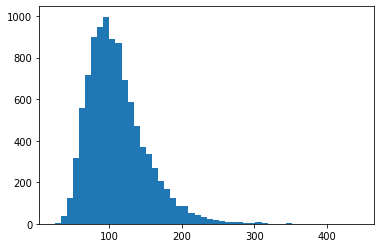

In [38]:
stochastic_bs()
plt.hist(s[-1],bins=50)

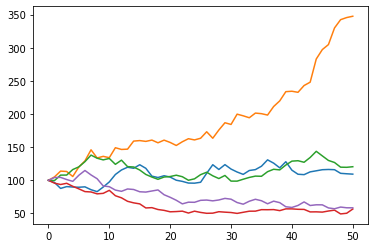

In [39]:
plt.plot(s[:,:5]) # first 5 paths. Rerunn

### Stochastic Volatility Model

A unrealistic assumption of the Block-Scholes model is the use of constant volatilty. Using a model developed by Heston we can model volatility stochastically,

### $$ ds_{t} = rs_{t}dt+\sqrt{v_t}s_{t}dZ{t} $$
### $$ dv_{t} = \kappa _{t}(\theta_{v} - v_{t})dt + \sigma _{v} \sqrt{v_t}dZ_{t} $$
### $$ dZ_{t}dZ_{t} = \rho $$

where $Z_{t}$ are Brownian motions which accounts for changes in volatility in bull/bear markets.

In [40]:
S0 = 100 
r=0.05 
v0=0.1 
kappa = 3.0 
theta = 0.25 
sigma = 0.1 
rho = 0.6 
T=1.0

corr_matrix = np.zeros((2,2))
corr_matrix[0,:] = [1.0, rho]
corr_matrix[1,:] = [rho, 1.0]
matrix = np.linalg.cholesky(corr_matrix) # creating a Cholesky decomp to account for correlation
print(matrix)

[[1.  0. ]
 [0.6 0.8]]


In [41]:
M = 50
I = 10000
nums = np.random.standard_normal((2, M+1,I))
delta_t = T/M
v = np.zeros_like(nums[0])
vh = np.zeros_like(v)
v[0] = v0
vh[0] = v0
for t in range(1,M+1):
    ran = np.dot(matrix, nums[:,t,:])
    vh[t] = (vh[t - 1] + kappa * (theta - np.maximum(vh[t - 1], 0)) * delta_t
    + sigma * np.sqrt(np.maximum(vh[t - 1], 0)) * np.sqrt(delta_t)
    * ran[1]) 
v = np.maximum(vh, 0)

In [42]:
s = np.zeros_like(nums[0])
s[0] = s0
for t in range(1,M+1):
    ran = np.dot(matrix, nums[:, t, :]) 
    s[t]=s[t-1]*np.exp((r-0.5*v[t])*delta_t+
        np.sqrt(v[t]) * ran[0] * np.sqrt(delta_t))

Text(0.5, 0, 'Volatility Level')

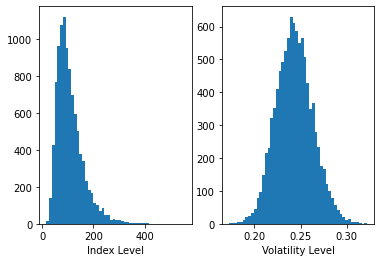

In [43]:
fig, (x1, x2) = plt.subplots(1,2)
x1.hist(s[-1], bins=50)
x1.set_xlabel("Index Level")
x2.hist(v[-1], bins=50)
x2.set_xlabel("Volatility Level")

Text(0, 0.5, 'Volatility')

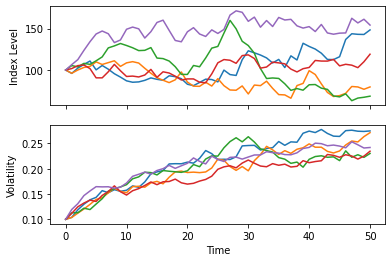

In [44]:
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True) 
ax1.plot(s[:, :5])
ax1.set_ylabel("Index Level")
ax2.plot(v[:, :5]) 
ax2.set_xlabel("Time") 
ax2.set_ylabel("Volatility")